In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_auc_score

In [7]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Function to fuse predictions based on the new rule
def output_fusion(threshold_predictions, isolation_forest_predictions):
    final_predictions = []

    for threshold_pred, iso_pred in zip(threshold_predictions, isolation_forest_predictions):
        # Only override Isolation Forest's prediction if it predicted "abnormal" (1)
        # and Threshold model predicted "normal" (0)
        if iso_pred == 1 and threshold_pred == 0:
            final_predictions.append(threshold_pred)  # Use Threshold's prediction
        else:
            final_predictions.append(iso_pred)  # Keep Isolation Forest's prediction

    return np.array(final_predictions)

# Function to process testing data and fuse predictions
def fuse_and_save_predictions(testing_data_folder):
    all_true_labels = []
    all_threshold_predictions = []
    all_iso_predictions = []
    all_final_predictions = []

    # Process testing data
    for file_name in os.listdir(testing_data_folder):
        if file_name.endswith('.csv'):
            file_path = os.path.join(testing_data_folder, file_name)
            data = pd.read_csv(file_path)

            # Print out the columns in the current CSV file for debugging purposes
            print(f"Columns in {file_name}: {data.columns.tolist()}")

            # Check if all required columns exist in the file
            required_columns = ['label', 'FilePrediction', 'Predicted_Label']
            missing_columns = [col for col in required_columns if col not in data.columns]

            if missing_columns:
                print(f"Skipping {file_name}: Missing columns {missing_columns}")
                continue

            # Extract predictions and true labels from the CSV file
            threshold_predictions = data['FilePrediction'].values
            isolation_forest_predictions = data['Predicted_Label'].values
            true_labels = data['label'].values  # Ground truth labels

            # Fuse predictions
            final_predictions = output_fusion(
                threshold_predictions,
                isolation_forest_predictions
            )

            # Save fused predictions in the CSV file
            data['FinalPrediction'] = final_predictions
            data.to_csv(file_path, index=False)

            # Collect predictions for evaluation
            all_true_labels.extend(true_labels)
            all_threshold_predictions.extend(threshold_predictions)
            all_iso_predictions.extend(isolation_forest_predictions)
            all_final_predictions.extend(final_predictions)

    return np.array(all_true_labels), np.array(all_threshold_predictions), np.array(all_iso_predictions), np.array(all_final_predictions)

# Function to evaluate and visualize fused predictions
def evaluate_fused_predictions(true_labels, threshold_predictions, iso_predictions, final_predictions):
    print("\nClassification Report (Final Predictions):")
    print(classification_report(true_labels, final_predictions))

    print("\nConfusion Matrix (Final Predictions):")
    print(confusion_matrix(true_labels, final_predictions))

    # ROC AUC
    roc_score = roc_auc_score(true_labels, final_predictions)
    print(f"\nROC AUC Score (Final Predictions): {roc_score:.2f}")

    # Plot comparison of model performance
    categories = ['Threshold', 'Isolation Forest', 'Fused']
    accuracies = [
        np.mean(true_labels == threshold_predictions),
        np.mean(true_labels == iso_predictions),
        np.mean(true_labels == final_predictions)
    ]

    plt.bar(categories, accuracies, color=['blue', 'orange', 'green'])
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Comparison')
    plt.ylim(0, 1)
    plt.show()



Columns in stance_features_1.csv: ['GRF', 'StrideTime', 'HeelStrike', 'MeanAcceleration', 'SDAcceleration', 'PercentStance', 'GeneralVelocity', 'TotalCycleDuration', 'FilePrediction', 'label', 'Predicted_Label']
Columns in stance_features_10.csv: ['GRF', 'StrideTime', 'HeelStrike', 'MeanAcceleration', 'SDAcceleration', 'PercentStance', 'GeneralVelocity', 'TotalCycleDuration', 'FilePrediction', 'label', 'Predicted_Label']
Columns in stance_features_11.csv: ['GRF', 'StrideTime', 'HeelStrike', 'MeanAcceleration', 'SDAcceleration', 'PercentStance', 'GeneralVelocity', 'TotalCycleDuration', 'FilePrediction', 'label', 'Predicted_Label']
Columns in stance_features_12.csv: ['GRF', 'StrideTime', 'HeelStrike', 'MeanAcceleration', 'SDAcceleration', 'PercentStance', 'GeneralVelocity', 'TotalCycleDuration', 'FilePrediction', 'label', 'Predicted_Label']
Columns in stance_features_2.csv: ['GRF', 'StrideTime', 'HeelStrike', 'MeanAcceleration', 'SDAcceleration', 'PercentStance', 'GeneralVelocity', 'Tota

C:\Users\diyav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\diyav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\diyav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

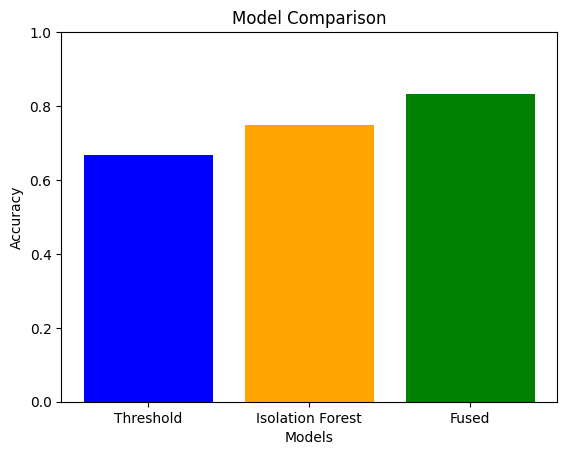

In [8]:

# Usage
testing_data_folder = r"C:\Users\diyav\.jupyter\Split Data\stance\test"
true_labels, threshold_predictions, iso_predictions, final_predictions = fuse_and_save_predictions(
    testing_data_folder
)

evaluate_fused_predictions(true_labels, threshold_predictions, iso_predictions, final_predictions)